In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('insurance.csv')

In [3]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


## Data Cleaning

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [5]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [6]:
df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


## Feature Engineering

In [7]:
Male = pd.get_dummies(df['sex'],drop_first=True)
df = pd.concat([df, Male], axis=1)

In [8]:
df.head()

,age,sex,bmi,children,smoker,region,charges,male
0,19,female,27.900,0,yes,southwest,16884.92400,False
1,18,male,33.770,1,no,southeast,1725.55230,True
2,28,male,33.000,3,no,southeast,4449.46200,True
3,33,male,22.705,0,no,northwest,21984.47061,True
4,32,male,28.880,0,no,northwest,3866.85520,True


In [9]:
Smoker = pd.get_dummies(df['smoker'], drop_first = True)
df = pd.concat([df, Smoker], axis =1)

In [10]:
df.head()

,age,sex,bmi,children,smoker,region,charges,male,yes
0,19,female,27.900,0,yes,southwest,16884.92400,False,True
1,18,male,33.770,1,no,southeast,1725.55230,True,False
2,28,male,33.000,3,no,southeast,4449.46200,True,False
3,33,male,22.705,0,no,northwest,21984.47061,True,False
4,32,male,28.880,0,no,northwest,3866.85520,True,False


In [11]:
df = df.rename(columns = {'yes':'Smoker'})
df.head()

,age,sex,bmi,children,smoker,region,charges,male,Smoker
0,19,female,27.900,0,yes,southwest,16884.92400,False,True
1,18,male,33.770,1,no,southeast,1725.55230,True,False
2,28,male,33.000,3,no,southeast,4449.46200,True,False
3,33,male,22.705,0,no,northwest,21984.47061,True,False
4,32,male,28.880,0,no,northwest,3866.85520,True,False


In [12]:
df['region'].unique()

array(['southwest', 'southeast', 'northwest', 'northeast'], dtype=object)

## Exploratory Analysis

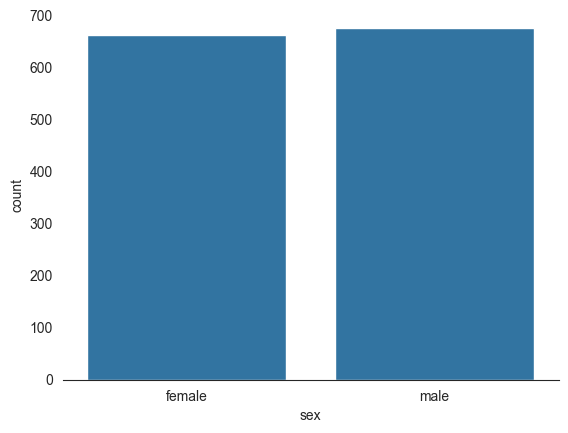

In [15]:
sns.countplot(x='sex', data= df)
sns.despine(left = True)

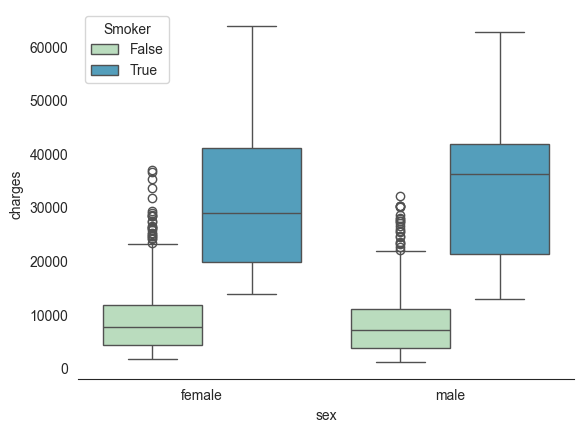

In [16]:
sns.boxplot(x='sex', y= 'charges', data = df, palette ='GnBu', hue = 'Smoker')
sns.despine(left = True)

<Axes: xlabel='age', ylabel='charges'>

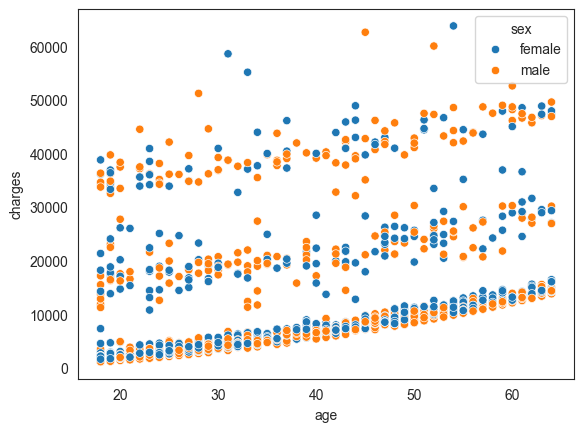

In [17]:
sns.scatterplot(x = 'age', y = 'charges', data =df, hue= 'sex')

<Axes: xlabel='age', ylabel='charges'>

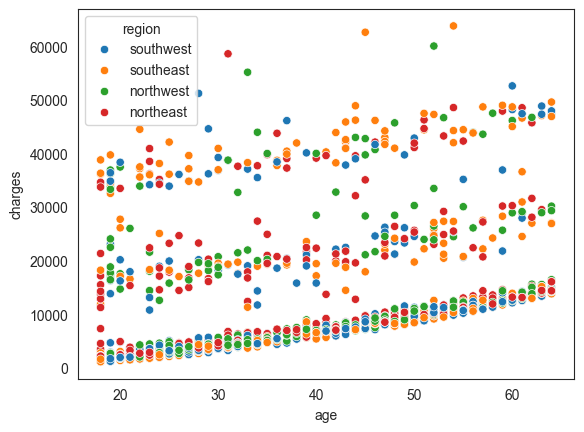

In [18]:
sns.scatterplot(x = 'age', y = 'charges', data =df, hue= 'region')


<Axes: xlabel='age', ylabel='charges'>

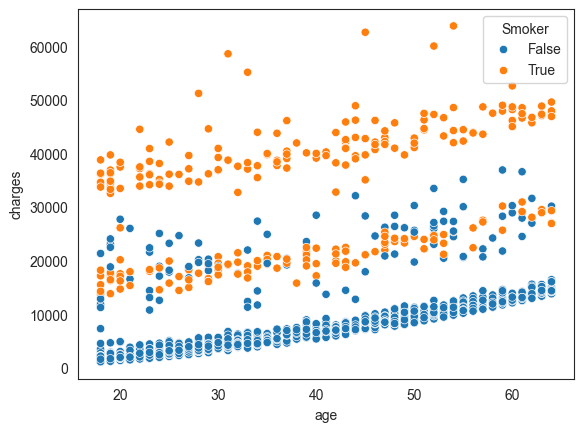

In [19]:
sns.scatterplot(x = 'age', y = 'charges', data =df, hue= 'Smoker')

<Axes: xlabel='bmi', ylabel='charges'>

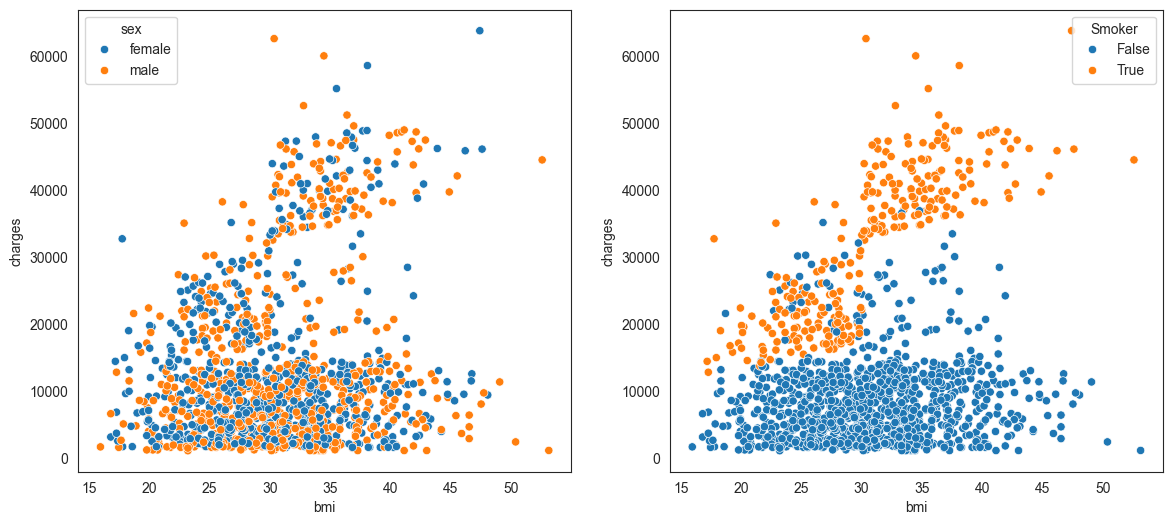

In [20]:
fig, ax = plt.subplots(nrows= 1, ncols = 2, figsize= (14,6))
sns.scatterplot(x = 'bmi', y = 'charges', data =df, hue= 'sex', ax= ax[0])
sns.scatterplot(x = 'bmi', y = 'charges', data =df, hue= 'Smoker', ax = ax[1])

<Axes: xlabel='bmi', ylabel='charges'>

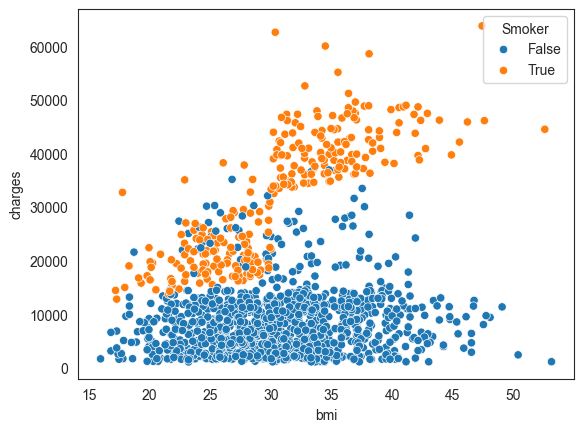

In [21]:
sns.scatterplot(x = 'bmi', y = 'charges', data =df, hue= 'Smoker')

In [22]:
df.head()

,age,sex,bmi,children,smoker,region,charges,male,Smoker
0,19,female,27.900,0,yes,southwest,16884.92400,False,True
1,18,male,33.770,1,no,southeast,1725.55230,True,False
2,28,male,33.000,3,no,southeast,4449.46200,True,False
3,33,male,22.705,0,no,northwest,21984.47061,True,False
4,32,male,28.880,0,no,northwest,3866.85520,True,False


In [24]:
df.drop(['sex', 'region', 'smoker'], axis=1, inplace=True)

<Axes: >

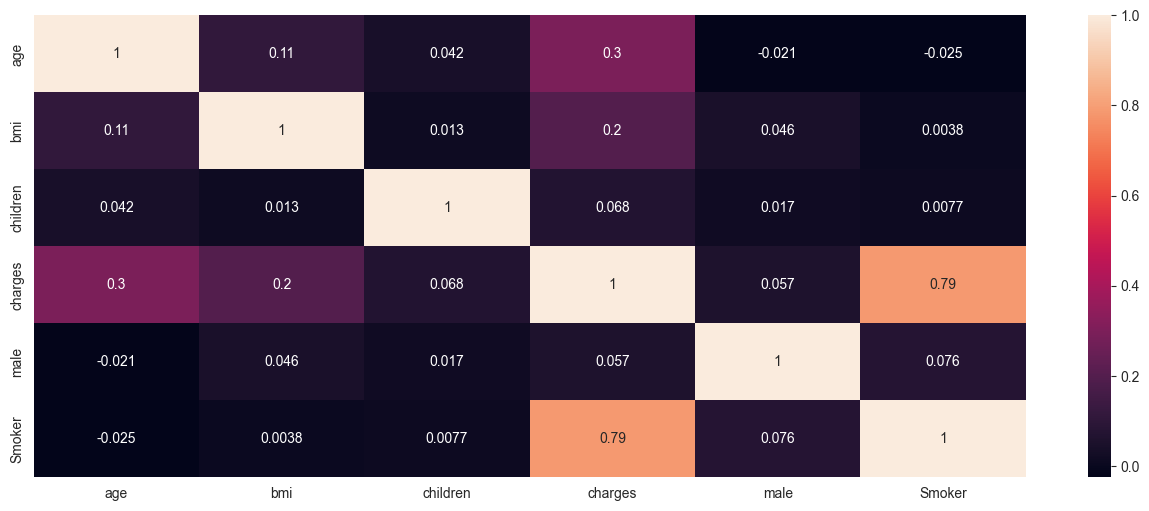

In [25]:
plt.figure(figsize=(16,6))
sns.heatmap(df.corr(), annot = True)

## Splitting the Data

In [26]:
x = df.drop('charges', axis = 1)
y = df['charges']

In [27]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.4)

In [28]:
x_train.shape

(802, 5)

In [29]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [30]:
scaled_x_train = scaler.fit_transform(x_train)
scaled_x_test = scaler.transform(x_test)

In [31]:
scaled_x_train

array([[ 1.03642832, -1.10489655,  0.75049   , -1.01761142, -0.50311529],
       [ 0.39828624, -0.84050881, -0.08085389,  0.98269338, -0.50311529],
       [-0.09804649,  1.07568842, -0.08085389,  0.98269338,  1.98761598],
       ...,
       [-1.44523532,  0.10326539, -0.91219779, -1.01761142, -0.50311529],
       [-0.94890259,  2.46229163,  0.75049   ,  0.98269338,  1.98761598],
       [-0.52347454,  0.06151996, -0.91219779,  0.98269338, -0.50311529]])

## Support Vector Machine

In [32]:
from sklearn.svm import SVR
regressor = SVR(kernel = 'rbf')
regressor.fit(scaled_x_train, y_train)

predict = regressor.predict(scaled_x_test)

In [33]:
predict

array([9034.87334558, 8994.62715371, 9088.6441124 , 9038.20501674,
       9066.13280874, 9138.19591869, 9072.44253728, 8994.06245611,
       9065.44260333, 9047.87498912, 9129.23433578, 9097.77245662,
       9118.64795541, 8990.1360339 , 9037.30159248, 9125.83087739,
       9128.87445936, 9129.2406781 , 9090.73083922, 9031.92689902,
       9028.25421018, 9058.33366355, 9123.34815342, 9096.0153802 ,
       9025.35016706, 9082.55997703, 9033.97819023, 8987.80464484,
       9027.72296121, 9043.68119778, 8998.65001134, 8988.55221524,
       9037.53437643, 9100.96699622, 9093.11081808, 9024.7245268 ,
       9009.70928311, 8985.08953164, 9054.46217468, 9068.65697272,
       9025.5886264 , 9120.81744452, 9123.56946621, 9119.44058146,
       9103.49583863, 9116.35512439, 9069.30914474, 9123.59471504,
       9093.78746358, 9034.71504068, 9122.67113063, 8993.1794355 ,
       9126.45940256, 8993.13590644, 9038.08943186, 8993.84386971,
       8989.6339102 , 9136.58372815, 9139.34875661, 9133.62441

In [34]:

y_test

794     7209.49180
961     3353.28400
782     9386.16130
533    19214.70553
120     7740.33700
          ...     
440     4738.26820
731    10065.41300
471     2203.47185
250    12829.45510
403    10269.46000
Name: charges, Length: 536, dtype: float64

In [35]:
np.mean((y_test - predict)**2)

171846443.75559807

Text(0.5, 0, 'Predict')

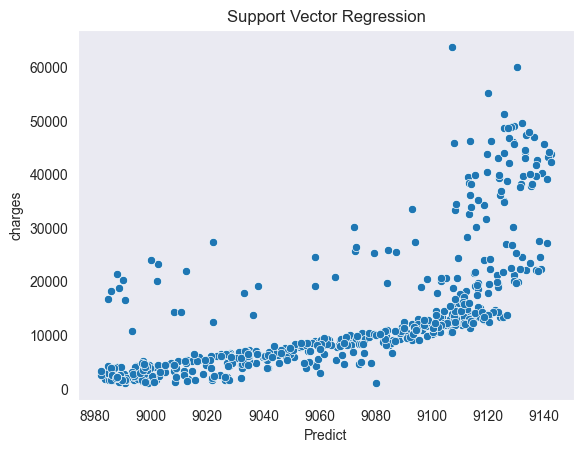

In [37]:
sns.set_style('dark')
f = sns.scatterplot(x = predict,y = y_test)
f.set_title('Support Vector Regression')
f.set_xlabel('Predict')